# Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load data

In [6]:
df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')

del df['Unnamed: 0']
del df_content['Unnamed: 0']

df[['article_id']]=df[['article_id']].astype(str)

In [7]:
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [8]:
df_content.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


# EDA

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article. 

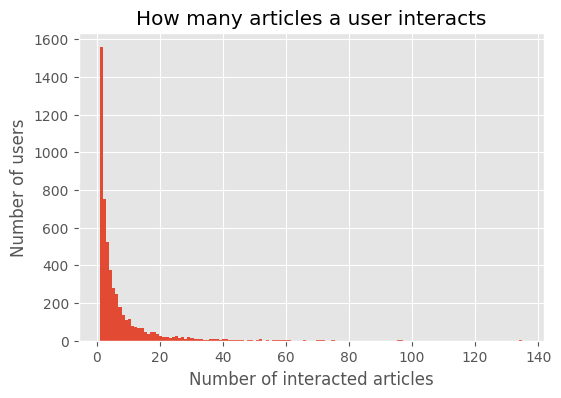

In [9]:
plt.style.use('ggplot')
df.groupby('email').agg({'article_id':pd.Series.nunique}).hist(bins=135, figsize=(6,4))
plt.title('How many articles a user interacts')
plt.xlabel('Number of interacted articles')
plt.ylabel('Number of users');

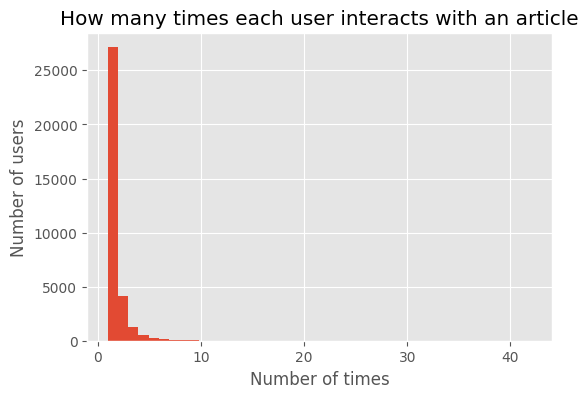

In [10]:
df.groupby(['email','article_id']).count().hist(bins=42, figsize=(6,4))
plt.title('How many times each user interacts with an article')
plt.xlabel('Number of times')
plt.ylabel('Number of users');

`2`. The median and maximum number of user_article interactions

- 50% of individuals interact with `3` number of articles or fewer
- The maximum number of user-article interactions by any 1 user is `364`

In [11]:
user_article_df = df.groupby('email').agg({'article_id':pd.Series.nunique})\
                    .reset_index().groupby('article_id').count()\
                    .sort_values('email',ascending=False)
user_article_df['cum_sum'] = user_article_df['email'].cumsum()
user_article_df['cum_perc'] =  100*user_article_df['cum_sum']/user_article_df['email'].sum()
user_article_df.rename(columns={'email':'email_count'}, inplace=True)

user_article_df.head()

,email_count,cum_sum,cum_perc
article_id,,,
1,1557,1557,30.244755
2,752,2309,44.852370
3,524,2833,55.031080
4,374,3207,62.296037
5,282,3489,67.773893


In [12]:
df.groupby('email').agg({'article_id':'count'})\
  .sort_values('article_id',ascending=False)\
  .rename(columns={'article_id':'article_interaction_count'})\
  .head()

,article_interaction_count
email,
2b6c0f514c2f2b04ad3c4583407dccd0810469ee,364
77959baaa9895a7e2bdc9297f8b27c1b6f2cb52a,363
2f5c7feae533ce046f2cb16fb3a29fe00528ed66,170
a37adec71b667b297ed2440a9ff7dad427c7ac85,169
8510a5010a5d4c89f5b07baac6de80cd12cfaf93,160


`3`. The number of unique articles that have an interaction with a user

In [17]:
unique_articles = df[~df['email'].isnull()]['article_id'].nunique()
unique_articles

714

`4`. The number of unique articles on the IBM platform (whether they have any interactions or not)

In [19]:
total_articles = df_content['article_id'].nunique()
total_articles

1051

`5`. The number of unique users in the dataset. (excluding null values)

In [20]:
unique_users = df['email'].nunique()
unique_users

5148

`6`. The number of user-article interactions

In [21]:
user_article_interactions = df.shape[0]
user_article_interactions

45993

`7`. The most viewed article id was `1429.0` and was viewed `937` times

In [22]:
df['article_id'].value_counts()

article_id
1429.0    937
1330.0    927
1431.0    671
1427.0    643
1364.0    627
         ... 
1344.0      1
984.0       1
1113.0      1
675.0       1
662.0       1
Name: count, Length: 714, dtype: int64